In [2]:
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [4]:
df.shape

(96, 4)

In [5]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [7]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [8]:
df = df.rename({'Life expectancy at birth (years)':'LEABY'},axis='columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Text(0.5, 0, 'GDP in Trillions of U.S. Dollars')

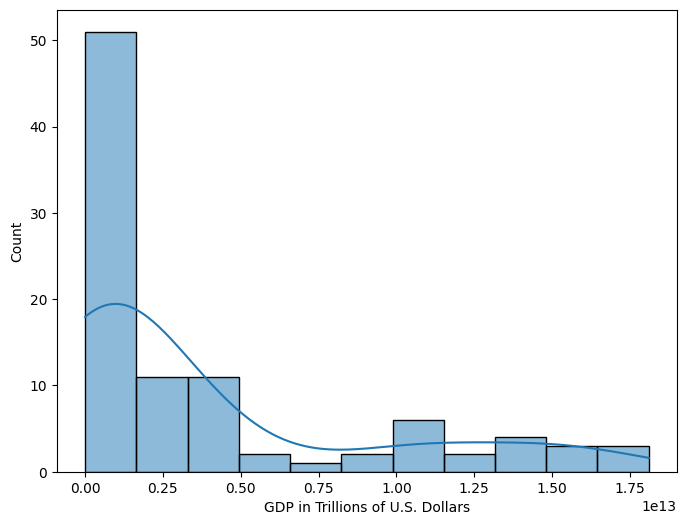

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(df.GDP,kde=True)
plt.xlabel('GDP in Trillions of U.S. Dollars')

Text(0.5, 0, 'Life expectancy at birth (years)')

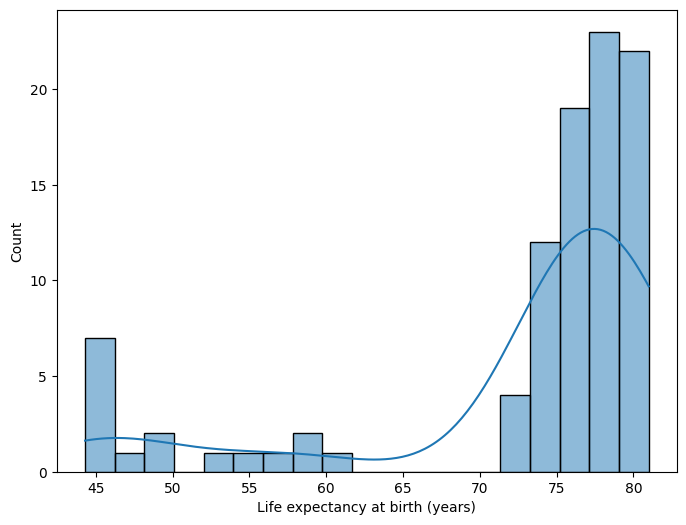

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df.LEABY,kde=True)
plt.xlabel('Life expectancy at birth (years)')

In [16]:
dfMeans = df.drop("Year", axis = 1).groupby("Country").mean().reset_index()

In [17]:
dfMeans

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


C:\Windows\Temp\ipykernel_8612\2082233953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dfMeans.LEABY,y=dfMeans.Country,palette='pastel')


Text(0.5, 0, 'Life expectancy at birth (years)')

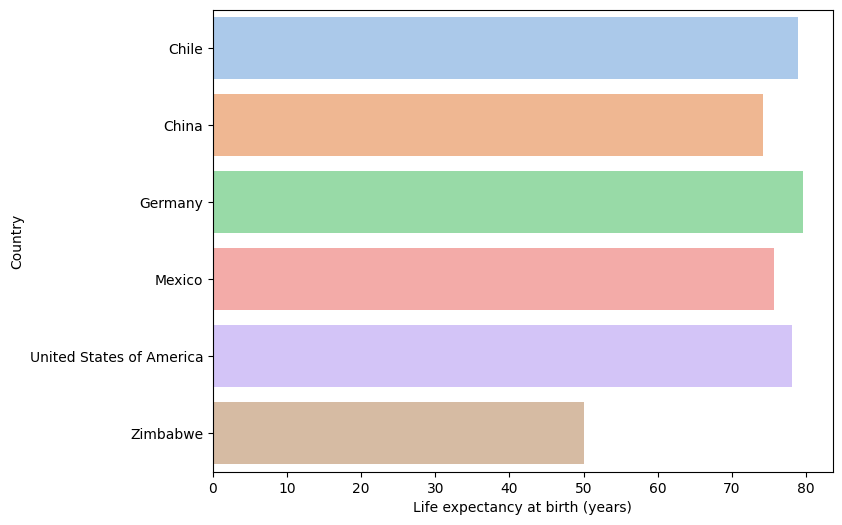

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x=dfMeans.LEABY,y=dfMeans.Country,palette='pastel')
plt.xlabel('Life expectancy at birth (years)')

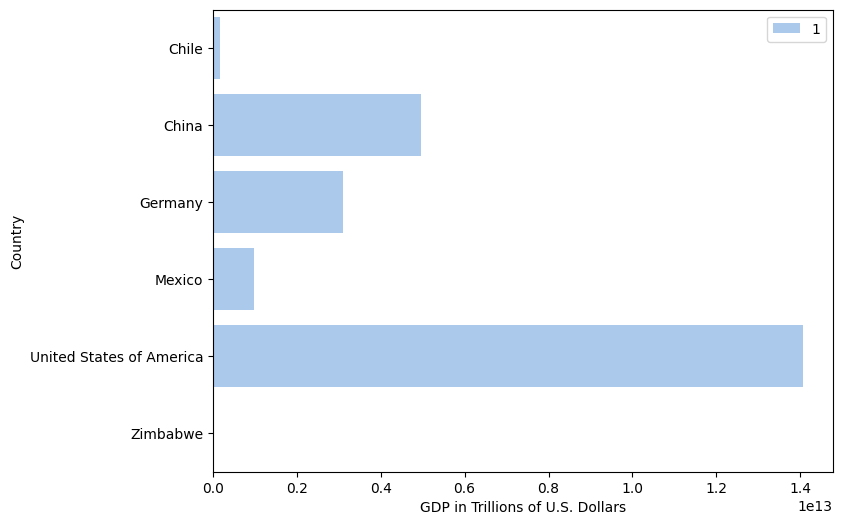

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=dfMeans.GDP, y=dfMeans.Country,hue=1,palette='pastel')
plt.xlabel("GDP in Trillions of U.S. Dollars");

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


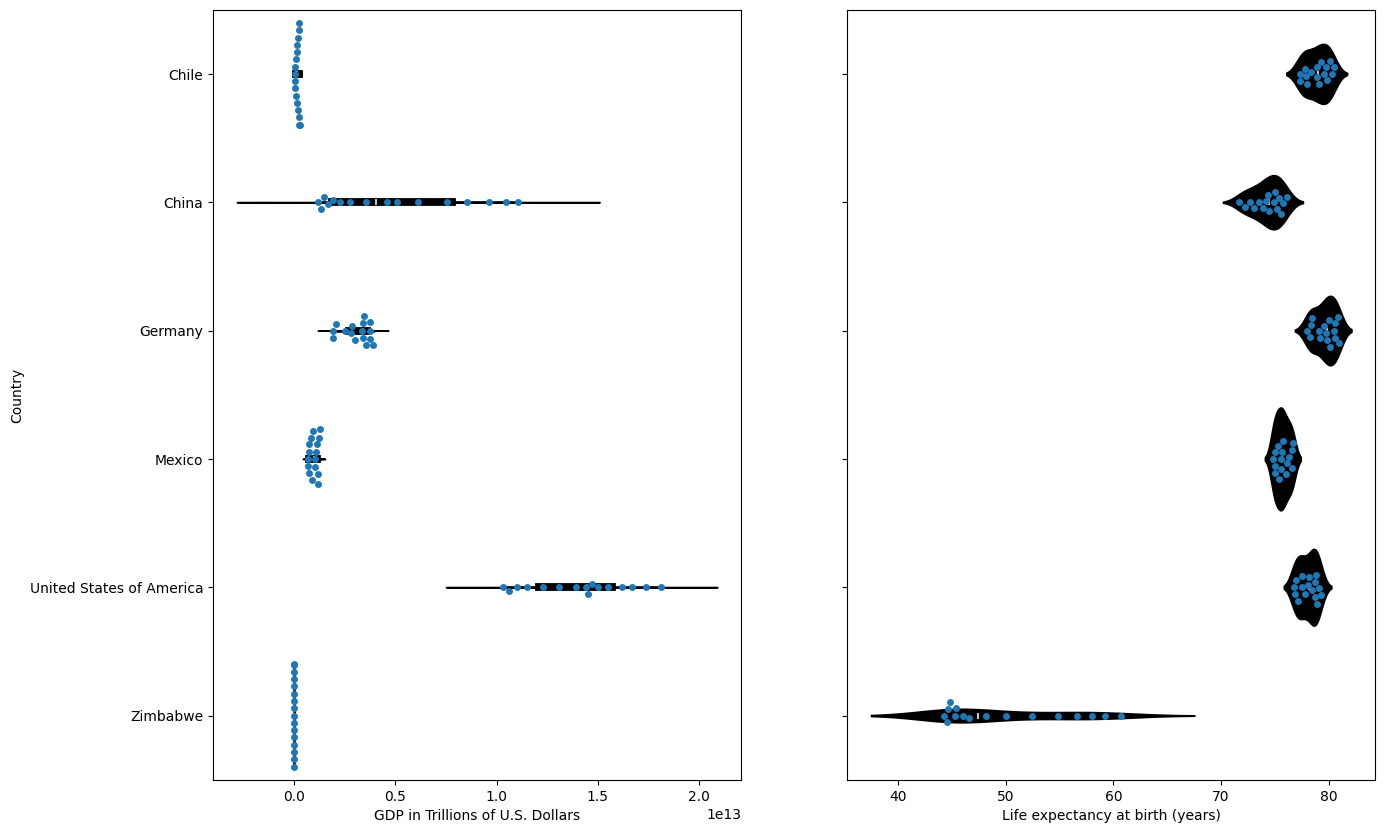

In [34]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 10))
axes[0] = sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=df.LEABY, y=df.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

Text(0, 0.5, 'GDP in Trillions of U.S. Dollars')

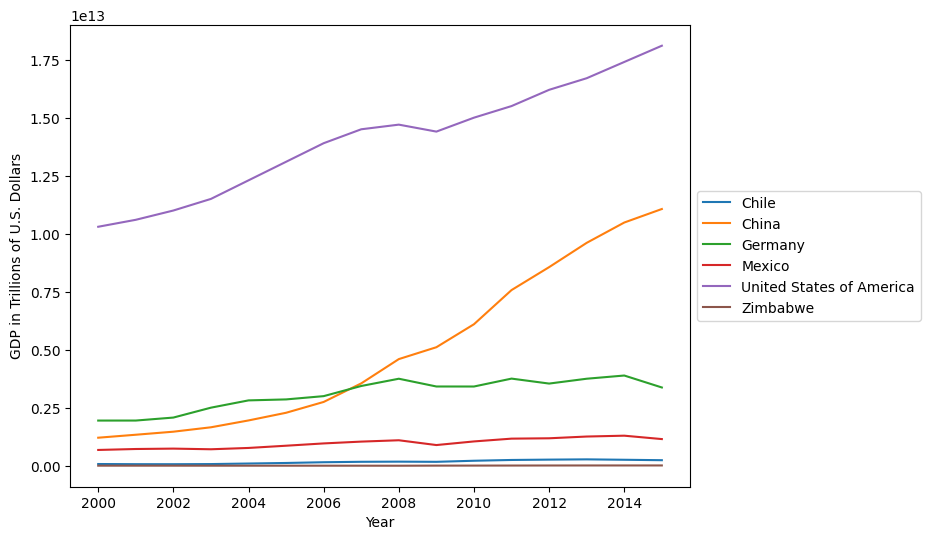

In [37]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year,y=df.GDP,hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel('GDP in Trillions of U.S. Dollars')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


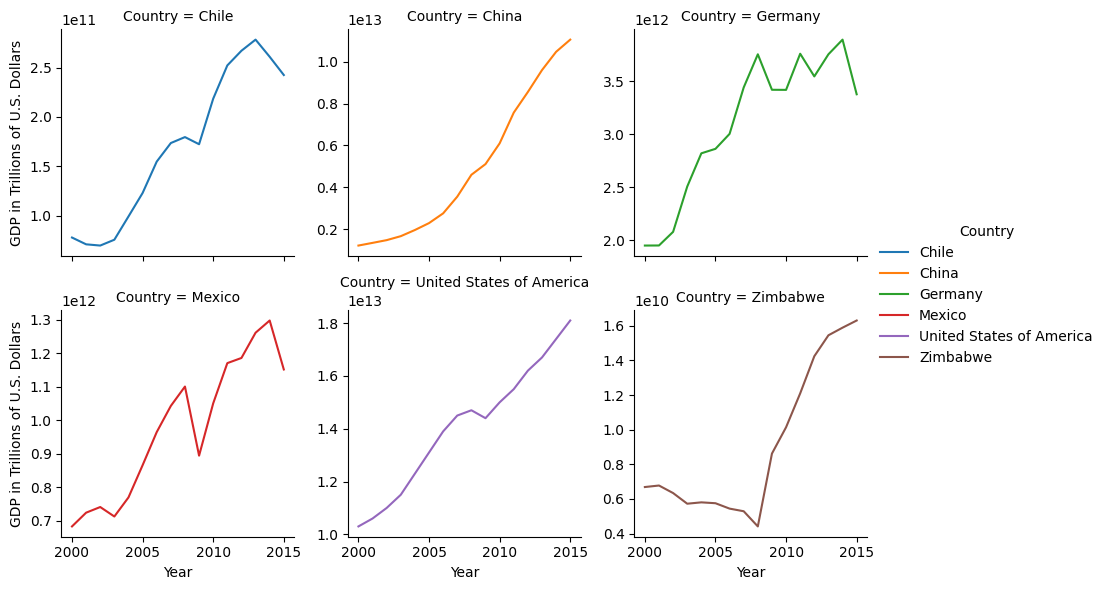

In [38]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphGDP;

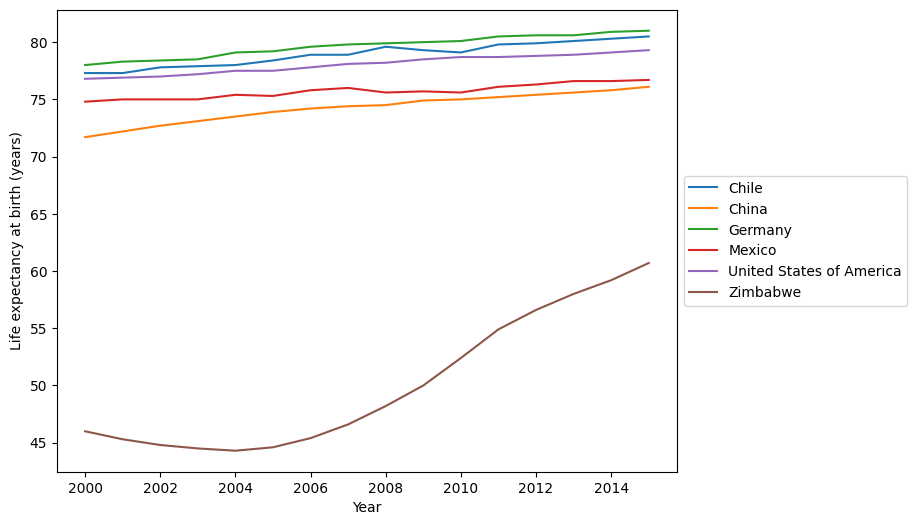

In [41]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year,y=df.LEABY,hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


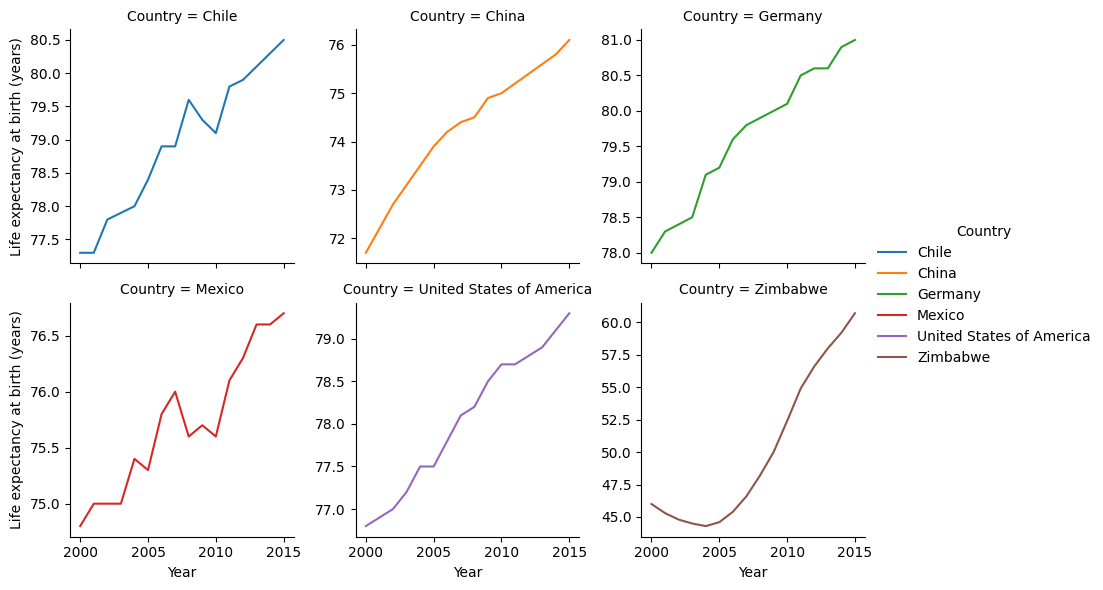

In [42]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


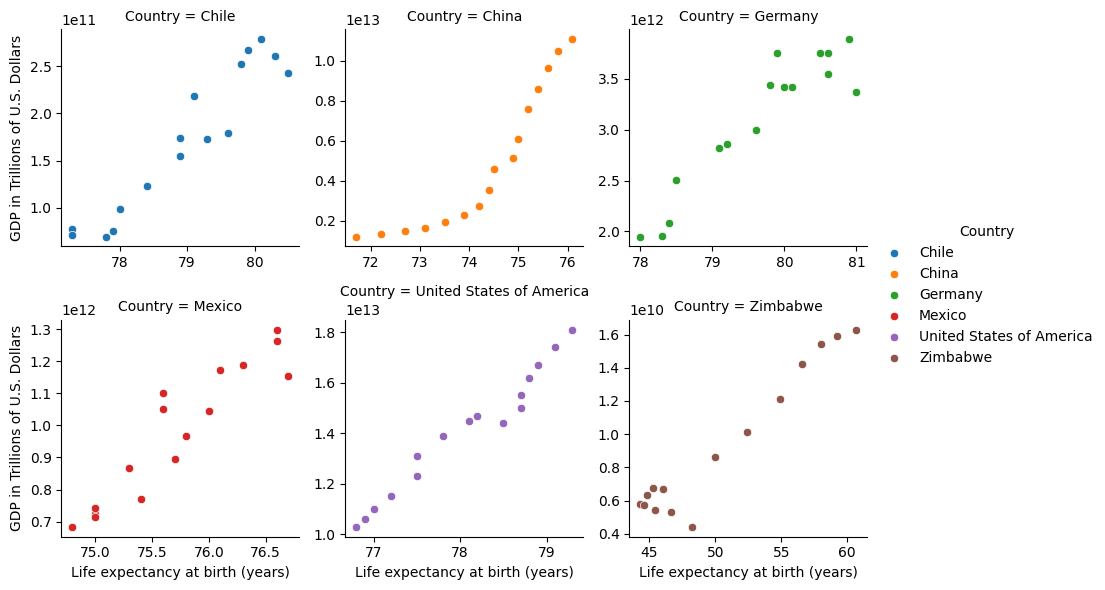

In [43]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
